# Atelier ML - Projet 1
## But du projet
- Machine Learning 
- Apprentissage supervisé
- Régression 

## Importation des libs

In [67]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np
import seaborn as sns

## Importation des fichiers et manipulations

In [69]:
df1 = pd.read_csv("housing.csv")
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Analyse statistique universée

In [70]:
df1.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


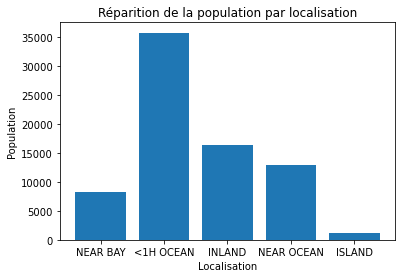

In [24]:
# Fig 1
fig1 = plt.subplot()
fig1.bar(df1["ocean_proximity"], df1["population"])
plt.xlabel("Localisation")
plt.ylabel("Population")
plt.title("Réparition de la population par localisation")

plt.show()

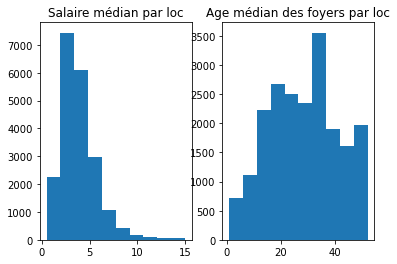

In [57]:
# Fig 2
# Extracting income values
q1_income = df1.describe(include="all").loc["25%"].median_income
median_income = df1.describe(include="all").loc["50%"].median_income
q3_income = df1.describe(include="all").loc["75%"].median_income
max_income = df1.describe(include="all").loc["max"].median_income

import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2)

# Plot histograms on each subplot
axs[0].hist(df1["median_income"])
axs[1].hist(df1["housing_median_age"])

# Set titles for subplots
axs[0].set_title('Salaire médian par loc')
axs[1].set_title('Age médian des foyers par loc')

plt.show()

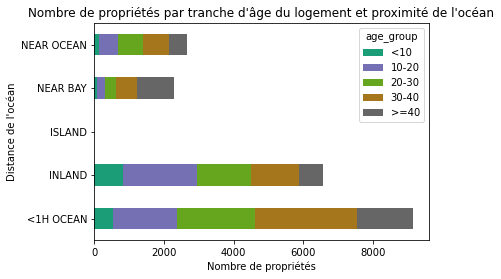

In [71]:
# Fig 3

# Définir les tranches pour 'housing_median_age'
bins = [0, 10, 20, 30, 40, float('inf')]
labels = ['<10', '10-20', '20-30', '30-40', '>=40']

# Créer une nouvelle colonne 'age_group' en fonction des tranches définies
df1['age_group'] = pd.cut(df1['housing_median_age'], bins=bins, labels=labels)

# Grouper les données par 'ocean_proximity' et 'age_group', puis compter le nombre d'éléments dans chaque groupe
counts = df1.groupby(['ocean_proximity', 'age_group']).size()

# Tracer un graphique à barres horizontal
counts.unstack().plot(kind='barh', stacked=True, colormap='Dark2')

# Titre du graphique
plt.title("Nombre de propriétés par tranche d'âge du logement et proximité de l'océan")

# Label de l'axe x
plt.xlabel("Nombre de propriétés")

# Label de l'axe y
plt.ylabel("Distance de l'océan")

# Afficher le graphique
plt.show()